In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

def histogram(frequency_table, rel_frequency=False, density=False, xlabel_rotation=0, xlabel=None, ylabel=None, title=None, on_bin_txt_space=0.05):
    """
    Plots a histogram from a frequency table with options for relative frequency, density, and custom labels.

    Parameters
    ----------
    frequency_table : dict
        A dictionary with two keys:
        - "Absolute Häufigkeit": List of absolute frequencies for each class.
        - "Klassen": List of class intervals in string format (e.g., "[0; 1)", "[1; 2)").
        
    rel_frequency : bool, optional
        If True, plots relative frequencies instead of absolute frequencies. Default is False.
        
    density : bool, optional
        If True, calculates and plots frequency density. If `rel_frequency` is also True, plots the relative frequency density. 
        Otherwise, plots the absolute frequency density. Default is False.
        
    xlabel_rotation : int or float, optional
        Rotation angle for x-axis labels. Default is 0.
        
    xlabel : str, optional
        Label for the x-axis. If None, defaults to "Klassen".
        
    ylabel : str, optional
        Label for the y-axis. If None, the label is automatically set based on the settings for `density` and `rel_frequency`.
        
    title : str, optional
        Title of the plot. If None, defaults to "Histogramm".
        
    on_bin_txt_space : float, optional
        Vertical space between the top of each bar and the label text above it. Default is 0.05.

    Returns
    -------
    None
        The function creates and displays a histogram plot.
    
    Notes
    -----
    - When `density=True`, the frequency density is calculated by dividing the frequency by the class width.
    - If `rel_frequency=True`, relative frequencies are displayed as percentages.
    - Bars represent the centers of each class interval, with class widths adjusting according to the specified class edges.
    - When `density=True`, the relative or absolute frequency density is displayed inside each bar.
    """

    fig, axes = plt.subplots(figsize=(10, 6))
    sns.set_palette("crest")
    
    absolute_frequencies = frequency_table["Absolute Häufigkeit"]
    sum_absolute_frequencies = sum(absolute_frequencies)
    relative_frequencies = [freq / sum_absolute_frequencies for freq in absolute_frequencies]
    classes = frequency_table["Klassen"]

    class_widths = []
    class_centers = []
    class_edges = []
    
    for bin in classes:
        bin_start, bin_end = map(float, bin.strip("[]()").split(";"))
        bin_width = bin_end - bin_start
        bin_center = (bin_start + bin_end) / 2
        
        class_widths.append(bin_width)
        class_centers.append(bin_center)
        class_edges.append(bin_start)
    class_edges.append(bin_end)

    # Bestimme die Höhen basierend auf density und rel_frequency
    if density:
        # Häufigkeitsdichte berechnen
        if rel_frequency:
            heights = [(rel_freq / width) for rel_freq, width in zip(relative_frequencies, class_widths)]
            ylabel = ylabel if ylabel else "Relative Häufigkeitsdichte"
        else:
            heights = [abs_freq / width for abs_freq, width in zip(absolute_frequencies, class_widths)]
            ylabel = ylabel if ylabel else "Absolute Häufigkeitsdichte"
    else:
        # Normale Häufigkeiten (absolute oder relative)
        heights = relative_frequencies if rel_frequency else absolute_frequencies
        ylabel = ylabel if ylabel else ("Relative Häufigkeit (%)" if rel_frequency else "Absolute Häufigkeit")
        if rel_frequency:
            axes.yaxis.set_major_formatter(PercentFormatter(1))

    # Erstelle das Histogramm
    bars = axes.bar(
        x=class_centers,
        height=heights,
        width=class_widths,
        edgecolor="black"
    )
    
    # Anpassungen am Plot
    axes.set_xticks(class_edges)
    axes.set_xticklabels(class_edges, rotation=xlabel_rotation)
    axes.grid(True, linestyle="--", alpha=0.7, axis="y")
    axes.set_ylabel(ylabel)
    axes.set_xlabel(xlabel if xlabel else "Klassen")
    axes.set_title(title if title else "Histogramm")  
    sns.despine()
    plt.tight_layout()

    # Text über den Balken und vertikale Linien
    for i, (bar, abs_freq, rel_freq, center, height) in enumerate(zip(bars, absolute_frequencies, relative_frequencies, class_centers, heights)):
        # Textinhalt und Position über dem Balken
        text = f"{rel_freq * 100:.3f}%" if rel_frequency else f"{abs_freq}"
        axes.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar.get_height() + on_bin_txt_space,
            s=text,
            ha="center",
            va="bottom",
            color="black",
            fontsize=8
        )
        # Vertikale Linien an Klassenmitten
        axes.vlines(
            x=center,     
            ymin=0,                 
            ymax=bar.get_height(),           
            color="grey",        
            linestyle="--",       
            alpha=0.3   
        )
        # Textinhalt innerhalb der Balken
        if density:
            text = f"{height:.3f}"
            axes.text(
                x=bar.get_x() + bar.get_width() / 2,
                y=height / 2,
                s=text,
                ha="center",
                va="bottom",
                color="black",
                fontsize=8
            )

## 1. Beispiel

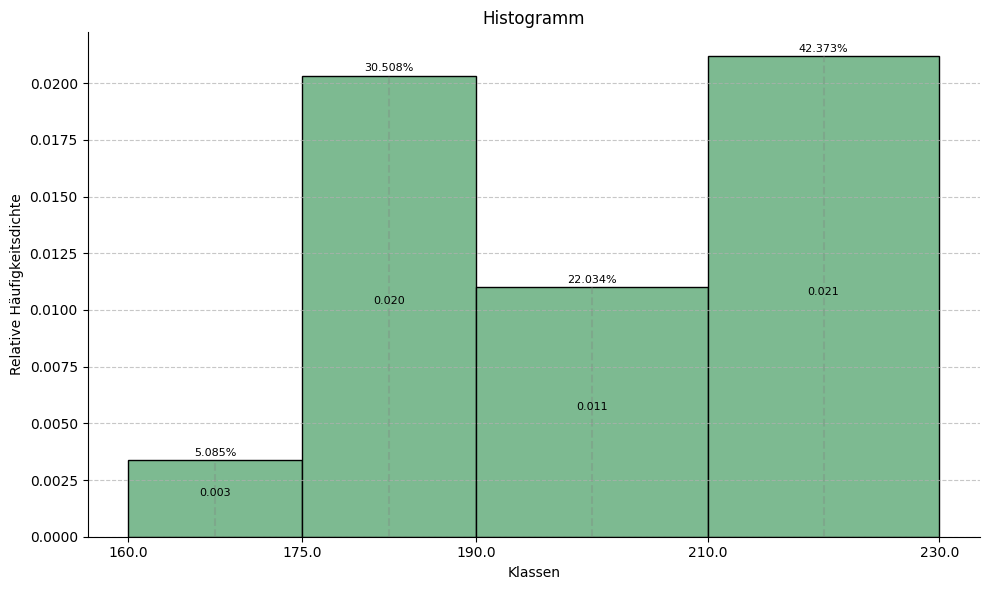

In [6]:
# Beispiel für die Verwendung
frequency_table = {
    "Absolute Häufigkeit": [3, 18, 13, 25],
    "Klassen": ["[160; 175)", "[175; 190)", "[190; 210)", "[210; 230)"]
}

# Aufruf der Funktion, um relative Häufigkeitsdichte darzustellen
histogram(frequency_table=frequency_table, rel_frequency=True, density=True, on_bin_txt_space=0.0001)

## 2. Beispiel

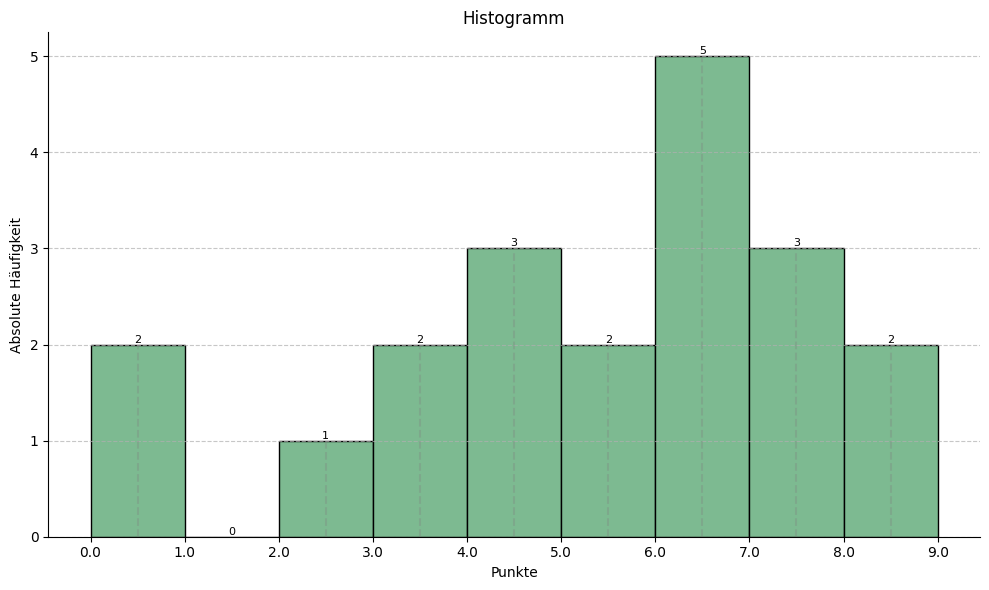

In [9]:
# Beispiel für die Verwendung
frequency_table = {
    "Absolute Häufigkeit": [2, 0, 1, 2, 3, 2, 5, 3, 2],
    "Klassen": ["[0; 1)", "[1; 2)", "[2; 3)", "[3; 4)", "[4; 5)", "[5; 6)", "[6; 7)", "[7; 8)", "[8; 9)"]
}

# Aufruf der Funktion, um relative Häufigkeitsdichte darzustellen
histogram(frequency_table=frequency_table, rel_frequency=False, density=False, on_bin_txt_space=0.0001, xlabel="Punkte")